In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
sns.set()

In [4]:
Data = pd.read_csv("Admission_Predict.csv")
Data.shape

(400, 9)

In [5]:
Data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
Data = Data.drop("Serial No.",axis=1)
Data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
Data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
Data["Chance"] = Data["Chance"].map(round)
Data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [9]:
y = Data["Chance"]
x = Data.iloc[:, 0:7]

In [10]:
reg = LR()
reg.fit(x,y)
reg.score(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.915

In [11]:
Pred = reg.predict(x)
Data["Predictions"] = Pred
Data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance,Predictions
0,337,118,4,4.5,4.5,9.65,1,1,1
1,324,107,4,4.0,4.5,8.87,1,1,1
2,316,104,3,3.0,3.5,8.00,1,1,1
3,322,110,3,3.5,2.5,8.67,1,1,1
4,314,103,2,2.0,3.0,8.21,0,1,1


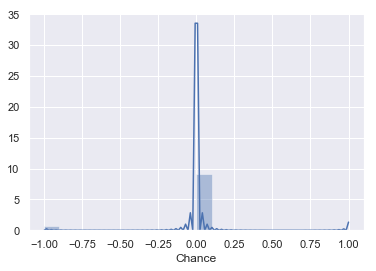

In [12]:
sns.distplot(y-Pred)

In [13]:
from sklearn import metrics

In [14]:
cm = metrics.confusion_matrix(y,Pred)
cm

array([[  6,  29],
       [  5, 360]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.915')

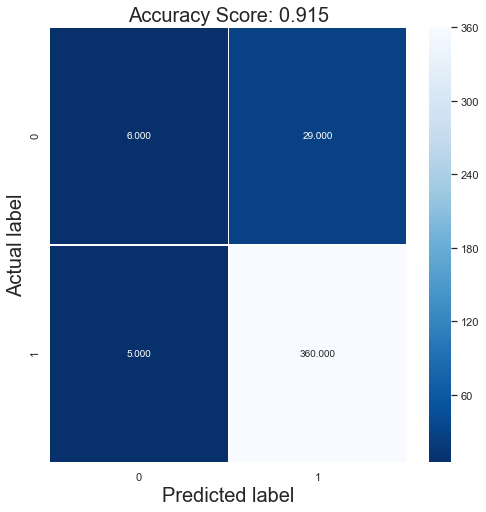

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap = 'Blues_r')
plt.ylabel('Actual label',fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x,y))
plt.title(all_sample_title, size = 20)